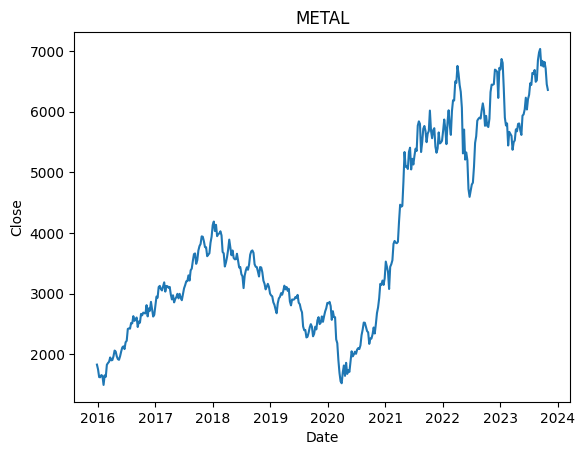

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_metal = pd.read_excel("D:/IT/dav/Stocks_Data.xlsx",sheet_name="metal_cnx")
plt.plot(df_metal['Date'],df_metal['Close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("METAL")
plt.show()

          Date         Open         High          Low        Close  \
215 2020-02-10  2687.649902  2692.850098  2608.850098  2613.600098   
216 2020-02-17  2614.350098  2627.250000  2514.000000  2612.250000   
217 2020-02-24  2578.800049  2578.800049  2230.600098  2246.050049   
218 2020-03-02  2307.600098  2351.449951  2133.800049  2183.899902   
219 2020-03-09  2101.949951  2107.949951  1546.150024  1903.349976   

       Adj Close   Volume  
215  2613.600098  5558700  
216  2612.250000  4484600  
217  2246.050049  6965700  
218  2183.899902  7779400  
219  1903.349976  9208100  
Percentage change:  -41.73171231645706


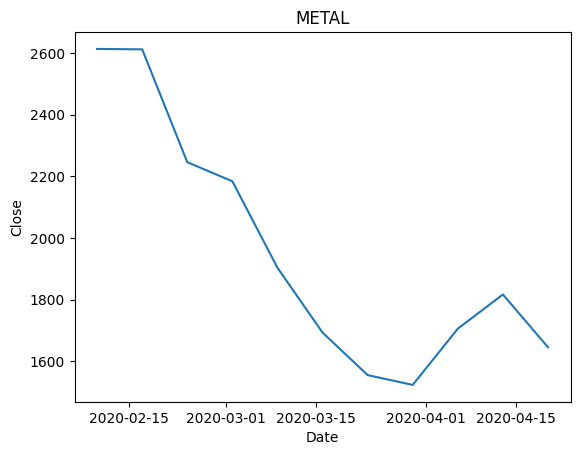

In [4]:
covid_period = df_metal[(df_metal['Date'] >= '2020-02-10') & (df_metal['Date'] <= '2020-04-20')]
print(covid_period.head())
change = ((covid_period['Close'].min()-covid_period['Close'].max())/covid_period['Close'].max())*100
print("Percentage change: ",change)
plt.plot(covid_period['Date'],covid_period['Close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("METAL")
plt.show()

          Date   Adj Close  percent_change
154 2019-01-07  110.270248       -5.184656
155 2019-01-14  116.879875        5.994026
156 2019-01-21  109.257919       -6.521188
157 2019-01-28  111.420181        1.979044
158 2019-02-04  107.046516       -3.925380
          Date    Adj Close  percent_change
157 2019-01-07  10794.95020        0.630170
158 2019-01-14  10906.95020        1.037522
159 2019-01-21  10780.54980       -1.158898
160 2019-01-28  10893.65039        1.049117
161 2019-02-04  10943.59961        0.458517
[0.17365860736610064, 0.38252986358674007, 0.08432590946101225, 0.18274621707410876]


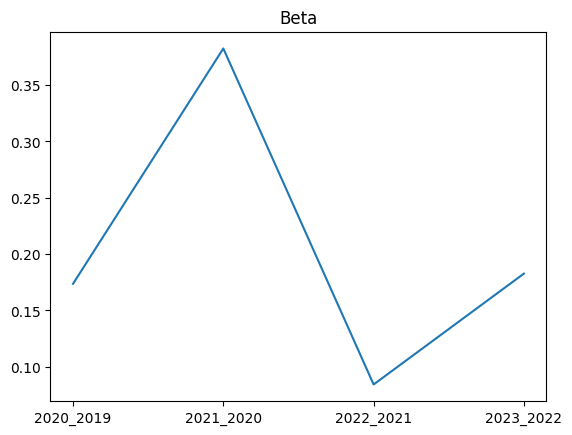

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df_apl_reg = pd.read_excel("D:/IT/dav/Stocks_Data.xlsx",sheet_name="APL")
df_apl_beta = []
df_apl_reg['Date'] = pd.to_datetime(df_apl_reg['Date'])
df_dates = ['2020_2019','2021_2020','2022_2021','2023_2022']
df_hcl_2020_2019 = df_apl_reg[(df_apl_reg['Date'] >= '2019-01-01') & (df_apl_reg['Date'] <= '2020-01-01')]
df_hcl_2021_2020 = df_apl_reg[(df_apl_reg['Date'] >= '2020-01-01') & (df_apl_reg['Date'] <= '2021-01-01')]
df_hcl_2022_2021 = df_apl_reg[(df_apl_reg['Date'] >= '2021-01-01') & (df_apl_reg['Date'] <= '2022-01-01')]
df_hcl_2023_2022 = df_apl_reg[(df_apl_reg['Date'] >= '2022-01-01') & (df_apl_reg['Date'] <= '2023-01-01')]
print(df_hcl_2020_2019.head())

df_nifty50 = pd.read_excel("D:/IT/dav/stocks.xlsx")
df_nifty50_2020_2019 = df_nifty50[(df_nifty50['Date'] >= '2019-01-01') & (df_nifty50['Date'] <= '2020-01-01')]
df_nifty50_2021_2020 = df_nifty50[(df_nifty50['Date'] >= '2020-01-01') & (df_nifty50['Date'] <= '2021-01-01')]
df_nifty50_2022_2021 = df_nifty50[(df_nifty50['Date'] >= '2021-01-01') & (df_nifty50['Date'] <= '2022-01-01')]
df_nifty50_2023_2022 = df_nifty50[(df_nifty50['Date'] >= '2022-01-01') & (df_nifty50['Date'] <= '2023-01-01')]
print(df_nifty50_2020_2019.head())

model = LinearRegression()
model.fit(df_hcl_2020_2019[['percent_change']], df_nifty50_2020_2019['percent_change'])
c1 = model.coef_[0]
df_apl_beta.append(c1)

model.fit(df_hcl_2021_2020[['percent_change']], df_nifty50_2021_2020['percent_change'])
c2 = model.coef_[0]
df_apl_beta.append(c2)

model.fit(df_hcl_2022_2021[['percent_change']], df_nifty50_2022_2021['percent_change'])
c3 = model.coef_[0]
df_apl_beta.append(c3)

model.fit(df_hcl_2023_2022[['percent_change']], df_nifty50_2023_2022['percent_change'])
c4 = model.coef_[0]
df_apl_beta.append(c4)

# Fit the model to the data
print(df_apl_beta)
plt.plot(df_dates,df_apl_beta)
plt.title("Beta")
plt.show()


In [9]:
import matplotlib.pyplot as plt
first = df_metal.head(1)['Adj Close'][0]
second = df_metal.tail(1)['Adj Close'][409]
print(first,second)
change = ((second-first)/first)*100
print("Percentage change: ",change)

1830.300049 6359.899902
Percentage change:  247.47854077121318


In [10]:
print("Correlation: ",df_metal['Adj Close'].corr(df_metal['Volume']))

Correlation:  0.15999640960128533


[None, None, None, None, None, None, None, None, None]

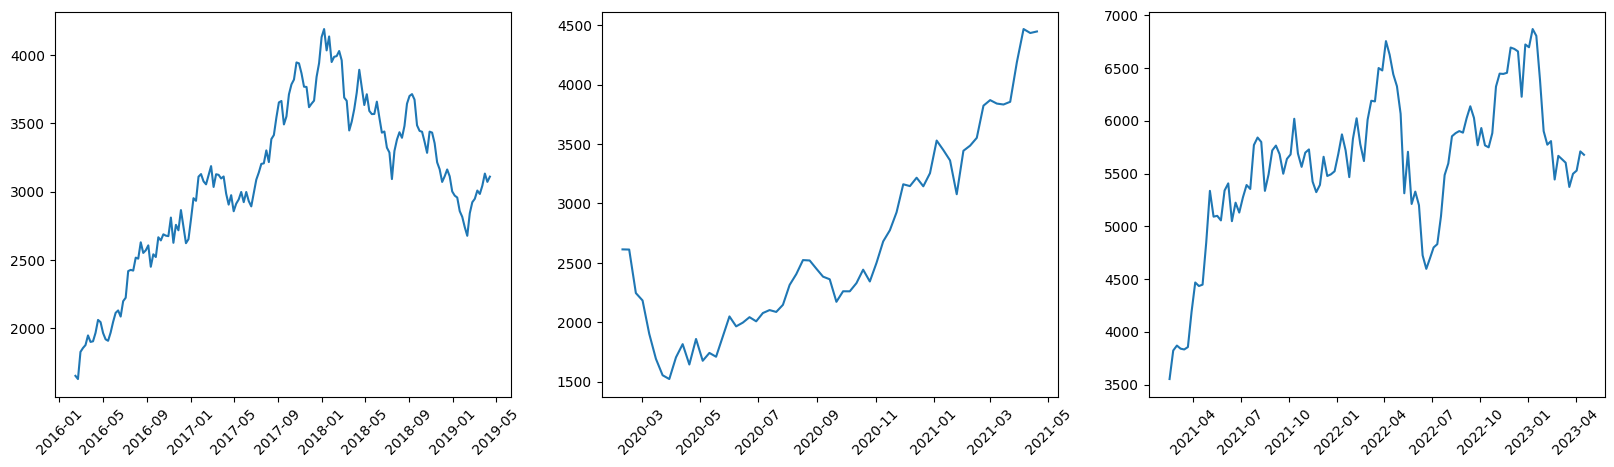

In [11]:
import matplotlib.pyplot as plt
pre_covid_period = df_metal[(df_metal['Date'] >= '2016-02-10') & (df_metal['Date'] <= '2019-04-20')]
covid_period = df_metal[(df_metal['Date'] >= '2020-02-10') & (df_metal['Date'] <= '2021-04-20')]
post_covid_period = df_metal[(df_metal['Date'] >= '2021-02-10') & (df_metal['Date'] <= '2023-04-20')]
fig , (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
ax1.plot(pre_covid_period['Date'],pre_covid_period['Close'])
ax2.plot(covid_period['Date'],covid_period['Close'])
ax3.plot(post_covid_period['Date'],post_covid_period['Close'])
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.setp(ax2.get_xticklabels(), rotation=45)
plt.setp(ax3.get_xticklabels(), rotation=45)

In [12]:
post_covid_period = df_metal[(df_metal['Date'] >= '2021-01-01') & (df_metal['Date'] <= '2023-01-01')]
change = ((post_covid_period['Adj Close'].max()-covid_period['Adj Close'].min())/covid_period['Adj Close'].min())*100
print(change)

343.5977213563955


56.45897304388804


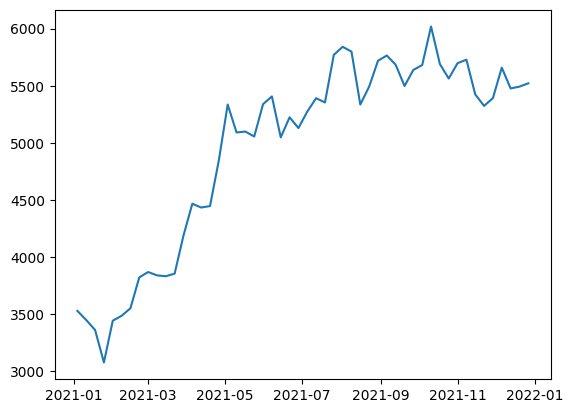

In [4]:
import matplotlib.pyplot as plt
df_metal_2022_2021 = df_metal[(df_metal['Date'] >= '2021-01-01') & (df_metal['Date'] <= '2022-01-01')]
first = df_metal_2022_2021.head(1)['Adj Close'][262]
second = df_metal_2022_2021.tail(1)['Adj Close'][313]
change = ((second-first)/first)*100
print(change)
plt.plot(df_metal_2022_2021['Date'],df_metal_2022_2021['Adj Close'])